#### [ 물꼬기 ]

[ 개발 주제 : 길이에 따른 생선 무게 예측 모델 ]
- 데이터셋 : fish.csv
 * 피쳐/특성/데이터 : 길이 
 * 타겟/정답/레이블 : 무게 
- 학습종류 : 지도학습 - 회귀
- 알고리즘 : 데이터셋 분석 후 결정 

In [132]:
# [1-1] 모듈 로딩
from sklearn.neighbors import KNeighborsRegressor                                                # 머신러닝 알고리즘 모듈
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error     # 성능평가 모듈 
from sklearn.model_selection import train_test_split                                             # 데이터셋 분리 모듈
import matplotlib.pyplot as plt 
import pandas as pd 

In [133]:
# [1-2] 데이터 준비
# 농어 무게/길이 데이터 

# 앞 뒤 바로 삭제 
# 1,2 행만 사용 
fish_df = pd.read_csv('fish.csv', skiprows = 73, header = None, skipfooter = 31, engine='python', usecols=[1,2])   

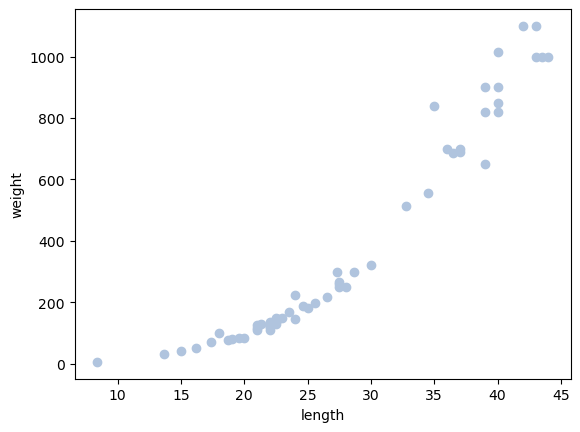

In [134]:
# [1-3] 탐색적 분석 - 시각화 
length = fish_df[2]
weight = fish_df[1]
plt.plot(length, weight, 'o', color='#B0C4DE')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [135]:
# [1-4] 탐색적 분석 결과
# - KNN 회귀 분석


In [136]:
# [2-1] 데이터셋 준비 => 
# (1) 피쳐와 타겟 분리  

# (2) 학습용, 검증용, 테스트용 분리
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 피쳐와 타겟 분리 
featureDF = fish_df[fish_df.columns[-1:]] # 슬라이싱 = 2차원  (피쳐)
targetSR = fish_df[fish_df.columns[0]]    # 인덱싱 = 1차원    (타겟)

In [137]:
# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)
# 학습용 : 테스트용 
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10)

In [138]:
# 인덱스 리셋
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(x_train.index, x_test.index)
print(y_train.index, y_test.index)

RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=14, step=1)
RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=14, step=1)


In [139]:
# [2-2] KNN 알고리즘 객체 / 인스턴스 생성 
fish_model = KNeighborsRegressor()

In [140]:
# [2-3] 학습 진행
fish_model.fit(x_train, y_train)


KNeighborsRegressor()

In [141]:
# [2-4] KNN
print(fish_model.n_features_in_)
print(fish_model.n_samples_fit_)    # 몇 개 학습?
print(fish_model.effective_metric_) # 선 그리는 방법?

1
42
euclidean


# 학습 평가

In [142]:
# [3-1] 훈련데이터 셋으로 예측 => predict(2D 피쳐 데이터)
pre_weight = fish_model.predict(x_train)

# [3-2] 모델 성능 평가 => score(2D 피쳐 데이터, 1D 타겟 데이터) : 모델 적합도
score = fish_model.score(x_train, y_train)
print(f'성능 : {score}')

# [3-3] 모델 손실 평가 => rmse, mse, mae => 1D 타겟 데이터, 1D 예측값 
rmse = root_mean_squared_error(y_train, pre_weight)
print(f'오차 : {rmse}')


성능 : 0.9784573278997548
오차 : 54.16730493396846


In [143]:
# [4-1] 테스트데이터 셋으로 예측 => predict(2D 피쳐 데이터)
pre_weight = fish_model.predict(x_test)

# [4-2] 모델 성능 평가 => score(2D 피쳐 데이터, 1D 타겟 데이터) : 모델 적합도
score = fish_model.score(x_test, y_test)
print(f'성능 : {score}')

# [4-3] 모델 손실 평가 => rmse, mse, mae => 1D 타겟 데이터, 1D 예측값 rmse = root_mean_squared_error(y_train, pre_y)
rmse = root_mean_squared_error(y_test, pre_weight)
print(f'오차 : {rmse}')


성능 : 0.9557072737458564
오차 : 44.636380101565464


In [144]:
# [5] 최근접 이웃 알고리즘의 동작원리 확인
# K개 만큼 가까이 있는 데이터를 추출
# 회귀 => K의 값을 모두 더한 후 평균 

In [145]:
# 데이터 지정 
x_train.iloc[0], y_train.iloc[0]

(2    19.0
 Name: 0, dtype: float64,
 np.float64(80.0))

In [146]:
# 이웃 찾기 : kneighbors(2D)
# nd.array 반환 
# 거리 값, 인덱스 값 반환 
distance, indices = fish_model.kneighbors([[19.0]])
print(f'distance = {distance} / indices = {indices}')

# 차원 축소 후 저장
# reshape에서 -1의 의미 : 컴퓨터가 알아서 해줌 / 원소 수는 안 바뀐다 
neighbor_idx = indices.reshape(-1)


distance = [[0.  0.3 0.6 1.  1. ]] / indices = [[ 0  1 32 41 18]]


In [147]:
x_train.iloc[neighbor_idx], y_train.iloc[neighbor_idx]


(       2
 0   19.0
 1   18.7
 32  19.6
 41  20.0
 18  18.0,
 0      80.0
 1      78.0
 32     85.0
 41     85.0
 18    100.0
 Name: 1, dtype: float64)

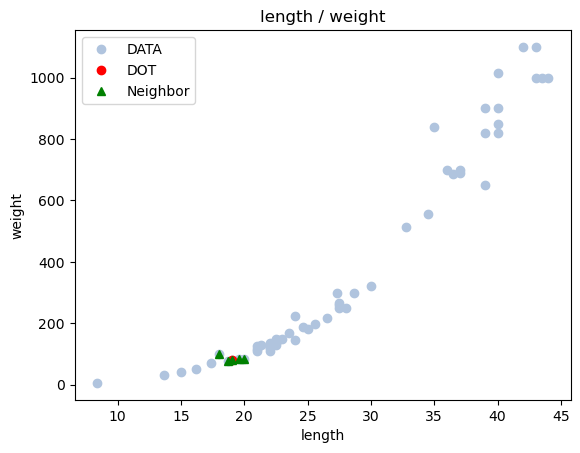

In [148]:
length = fish_df[2]
weight = fish_df[1]
plt.plot(length, weight, 'o', color='#B0C4DE', label="DATA")
plt.plot(x_train.iloc[0], y_train.iloc[0], 'o', color='red', label="DOT")
plt.plot(x_train.iloc[neighbor_idx], y_train.iloc[neighbor_idx], '^', color='green', label="Neighbor")
plt.xlabel('length')
plt.ylabel('weight')
plt.title('length / weight')
plt.legend()
plt.show()

In [149]:
# 예측값 : K개 즉, 5개 이웃 데이터의 무게 weight를 평균 낸 것으로 예측값 반환
pre_weight = y_train[neighbor_idx].mean()

print(f'길이 19.0 생선의 무게 예측은 : {pre_weight}')

길이 19.0 생선의 무게 예측은 : 85.6


In [150]:
# [6] 최적의 K 찾기 
# - 최근접 이웃 갯수 => k
# - 기본값 : 5
# - 나의 데이터에 최적인 k 찾기 
#  1 ~ 전체 데이터 수만큼 K값 변경한 KNR 인스턴스 생성
#  학습, 예측, 성능평가 비용계산 결과 비교
#  성능평가 높고 비용계산 낮은 k 결정

In [151]:
Data_nums = x_train.shape[0]

# k 갯수에 따른 모델 성능과 비용함수값 저장
histories = {'score': [], 'rmse': [] }   # [score_list, rmse_list]

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, Data_nums+1):
    # KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    # KNR 학습 및 예측 
    model.fit(x_train, y_train)
    pre_ = model.predict(x_train)
    
    # KNR 성능평가 및 비용계산
    score = model.score(x_train, y_train)
    rmse = root_mean_squared_error(y_train, pre_)
    
    # 저장 
    histories['score'].append(score)
    histories['rmse'].append(rmse)

In [152]:
histories['score']

[0.9839739407771927,
 0.9815504872688875,
 0.9819388154902648,
 0.9815355663609397,
 0.9784573278997548,
 0.9744829938405256,
 0.9755266690443957,
 0.9744696460932932,
 0.9774430654930567,
 0.9708999569730309,
 0.9667629106605549,
 0.9596155427769033,
 0.9464087815683855,
 0.9425253094414373,
 0.9372540957641863,
 0.9354874768657034,
 0.9279569190067318,
 0.9194785810548529,
 0.9079268138386352,
 0.896120731642103,
 0.8787333545738312,
 0.858535401167817,
 0.8350488711397113,
 0.8153783544646639,
 0.791281881411492,
 0.7599836619677534,
 0.7251140268249456,
 0.6882320118707485,
 0.6497797664052141,
 0.6112165371932946,
 0.5730604885246238,
 0.5296361386546657,
 0.4923368316953145,
 0.4435958284871272,
 0.38749851331698826,
 0.3405243565124938,
 0.2913264188207596,
 0.23141004568344303,
 0.17534571521130493,
 0.11286524666613473,
 0.05455126182800751,
 0.0]

In [153]:
histories['rmse']

[46.71978269682015,
 50.12794404131815,
 49.59758805366185,
 50.148210247938344,
 54.16730493396846,
 58.95251014486959,
 57.734310570959316,
 58.96792692854311,
 55.42777964715668,
 62.955584154151694,
 67.28200651166796,
 74.16424289333641,
 85.43469198642576,
 88.4760577305815,
 92.44429901354556,
 93.73665602454405,
 99.05663740460172,
 104.72325975234426,
 111.98349778376763,
 118.94655918380603,
 128.5162735942621,
 138.8069874089266,
 149.8873869682393,
 158.5728205968591,
 168.60386195317062,
 180.8039212446654,
 193.4923201011889,
 206.06451093389109,
 218.40272822432178,
 230.11309531212473,
 241.14075529918276,
 253.107151320855,
 262.95126859985106,
 275.28505284610196,
 288.8291459396328,
 299.7000549846779,
 310.678045214308,
 323.54507573905187,
 335.13779071577335,
 347.6019778854986,
 358.84461695461647,
 369.0518973715143]

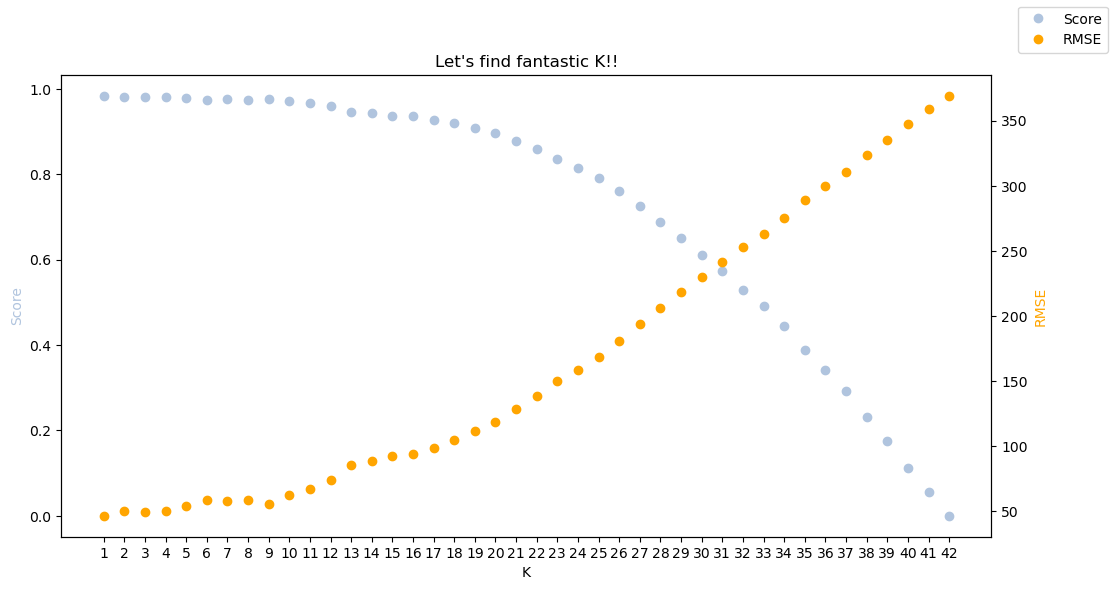

In [ ]:
# 과소 / 과대적합이 아닌 K 찾기 ! 
fig, ax1 = plt.subplots(figsize=(12, 6))

# score
ax1.plot(range(1, Data_nums + 1), histories['score'], 'o', color='#B0C4DE', label="Score")
ax1.set_xlabel('K')
ax1.set_ylabel('Score', color='#B0C4DE')
ax1.tick_params(axis='y')

# rmse
ax2 = ax1.twinx()  # 새로운 y축 생성 
ax2.plot(range(1, Data_nums + 1), histories['rmse'], 'o', color='orange', label="RMSE")
ax2.set_ylabel('RMSE', color='orange')
ax2.tick_params(axis='y')

plt.xticks(list(range(1, Data_nums + 1)))
plt.title("Let's find fantastic K!!")
fig.legend()
plt.show()

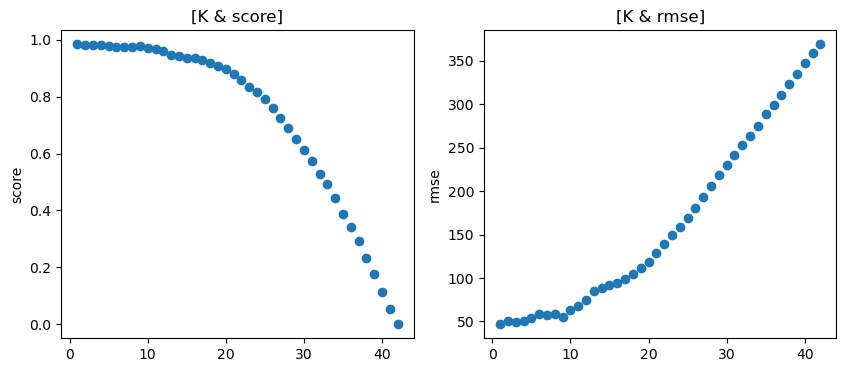

In [156]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()
for ax, ylabel in zip(axes, ['score', 'rmse']):
    ax.plot(range(1, Data_nums + 1), histories[ylabel], 'o')
    ax.set_ylabel(ylabel)
    ax.set_title(f'[K & {ylabel}]')
plt.show()